In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.metrics import mean_squared_error, zero_one_loss

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [3]:
def generate_data():
    x = np.empty(1505)
    y = np.empty(1505)

    x[0]=1.5
    y[0]=0

    for i in range(1500):
        if i<25:
            x[i+1] = x[i] - 0.1*x[i]

        else:
            x[i+1] = x[i] + ((0.2*x[i-25])/(1+pow(x[i-25],10))) - 0.1*x[i]
        y[i+1]=i
    
    inp=[]
    out=[]
    for i in range(300,1500):
        inp.append([x[i-20], x[i-15], x[i-10], x[i-5], x[i]])
        out.append(x[i+5])
        
    train_X = np.array(inp[0:1000])
    train_y = np.array(out[0:1000])

    val_X = np.array(inp[800:1000])
    val_y = np.array(out[800:1000])

    test_X = np.array(inp[1000:])
    test_y = np.array(out[1000:])
    
    return (train_X, train_y, val_X, val_y, test_X, test_y, x, y)

In [4]:
train_X, train_y, val_X, val_y, test_X, test_y, x, y = generate_data()
train_X = train_X.astype('float')
train_y = train_y.astype('float')
train_X.reshape(-1, 1)
train_y.reshape(-1, 1)
test_X = train_X.astype('float')
test_y = train_y.astype('float')
test_X.reshape(-1, 1)
test_y.reshape(-1, 1)

array([[0.94921825],
       [0.99567019],
       [1.03083227],
       [1.05574157],
       [1.07331517],
       [1.08680026],
       [1.09898505],
       [1.11192034],
       [1.12687925],
       [1.144416  ],
       [1.16446573],
       [1.18645673],
       [1.20942842],
       [1.23217564],
       [1.25344232],
       [1.27214516],
       [1.28757326],
       [1.29952211],
       [1.30835602],
       [1.31500744],
       [1.32089315],
       [1.32765247],
       [1.33651569],
       [1.34707337],
       [1.35559491],
       [1.35483427],
       [1.33846259],
       [1.30634322],
       [1.26325991],
       [1.21455658],
       [1.16397122],
       [1.11346514],
       [1.06368798],
       [1.01450308],
       [0.9654417 ],
       [0.9160573 ],
       [0.86615702],
       [0.81589457],
       [0.76573603],
       [0.71634098],
       [0.66841736],
       [0.62260087],
       [0.57938305],
       [0.53908302],
       [0.50184375],
       [0.46763509],
       [0.43625874],
       [0.407

In [40]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
clf = MLPRegressor(solver='sgd', 
                            batch_size='auto',
                            hidden_layer_sizes=(8),
                            early_stopping=True
                           )
grid = GridSearchCV(estimator=clf, param_grid=dict(alpha=alphas))
grid.fit(train_X, train_y)

print(grid.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: Conve

{'alpha': 0.001}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Grid: [[0.05272709 0.05270806 0.06691741 0.0572455  0.05338996 0.04306731
  0.01950105 0.04838235]
 [0.05257759 0.05279117 0.02614842 0.02441621 0.02166417 0.10295138
  0.15358324 0.01561989]
 [0.01776508 0.05212973 0.02376781 0.03220014 0.05275165 0.07191952
  0.05431085 0.02164947]
 [0.05212315 0.0399563  0.02837342 0.0516439  0.02419862 0.02631384
  0.12513978 0.03004062]
 [0.0549547  0.02270029 0.02382925 0.01790519 0.09181381 0.05169951
  0.0420262  0.03163742]
 [0.04547274 0.10812153 0.01464084 0.01749969 0.03694035 0.04515875
  0.02677328 0.01953497]]


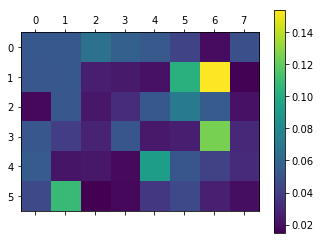

In [33]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
hidden = range(1, 9)

# Grid search for alpha and number of hidden layers
grid = np.zeros([len(alphas), len(hidden)])
mses = []
for i in range(len(alphas)):
    for j in range(len(hidden)):
        clf = MLPRegressor(solver='sgd', 
                            batch_size='auto', 
                            alpha=alphas[i],
                            hidden_layer_sizes=(hidden[j]),
                            early_stopping=True
                           )
        clf.fit(train_X, train_y)
        pred = clf.predict(val_X)
        grid[i, j] = mean_squared_error(pred, val_y)

print("Grid:", grid)
plt.matshow(grid)
plt.colorbar()
plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


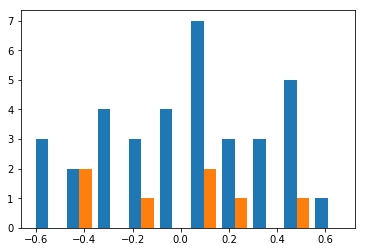

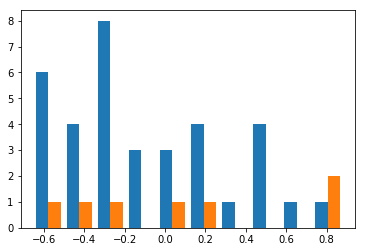

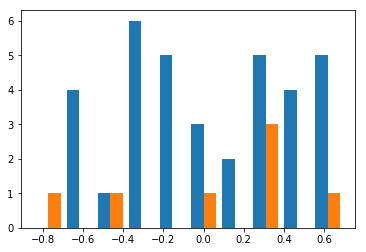

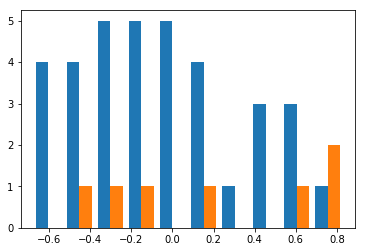

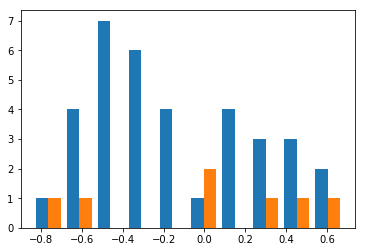

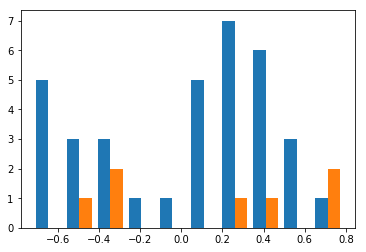

In [45]:
# What is the effect of regularisation on the distribution of wieghts

alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])

# Grid search for alpha and number of hidden layers
grid = np.zeros([len(alphas), len(hidden)])
weights = []
for i in range(len(alphas)):
    clf = MLPRegressor(solver='sgd', 
                        batch_size='auto', 
                        alpha=alphas[i],
                        hidden_layer_sizes=7,
                        early_stopping=True
                       )
    clf.fit(train_X, train_y)
    weights.append(clf.coefs_)
    #plt.hist(clf.coefs_[0])

for i in range(len(weights)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(weights[i])
    
#print("Weights:", weights[0])
#plt.matshow(grid)
#plt.colorbar()
#plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


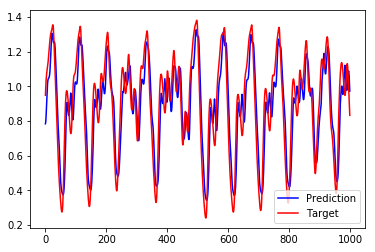

In [49]:
# Final evaluation
clf = MLPRegressor(solver='sgd', 
                        batch_size='auto', 
                        alpha=0,
                        hidden_layer_sizes=8,
                        early_stopping=True
                       )
clf.fit(train_X, train_y)
pred = clf.predict(test_X)

plt.plot(pred, 'b-', label='Prediction')
plt.plot(test_y, 'r-', label='Target')
plt.legend()
plt.show()